<h1>Determining whether a sample is a balloon or a kharbozeh</h1>

<img src="/home/danial/project/learning_python/machin_learning3/kharbozeh.jpg" alt="kharbozeh" width="200" height="400" >
<img src="/home/danial/project/learning_python/machin_learning3/balloon.jpg" alt="melon" >

In [602]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [603]:
N = 1000
std = 0.3

Balloon specifications

In [604]:
Balloon_length = np.random.normal(4 , std , N)
Balloon_width = np.random.normal(5 , std , N)
Balloon_weight = np.random.normal(0.5 , std , N)


Kharbozeh specifications

In [605]:
Kharbozeh_length = np.random.normal(6 , std , N)
Kharbozeh_width = np.random.normal(3, std , N)
Kharbozeh_weight = np.random.normal(2 , std , N)

In [606]:
width = np.concatenate((Balloon_width , Kharbozeh_width))
length = np.concatenate((Balloon_length , Kharbozeh_length))
weight = np.concatenate((Balloon_weight , Kharbozeh_weight))

In [607]:
print(width)
print(length)
print(weight)

[5.12156907 5.16279396 4.9849596  ... 3.19315507 3.16907373 3.15717182]
[3.37857349 4.50033731 3.86510601 ... 6.1037582  5.65226704 5.69461512]
[-1.58950779e-03  5.40134290e-01  3.28461102e-01 ...  2.20448933e+00
  2.10983995e+00  2.24529479e+00]


In [608]:
print(len(width))
print(len(length))
print(len(weight))

2000
2000
2000


In [609]:
print(type(width))
print(type(length))
print(type(weight))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [610]:
clean = np.array([width , length , weight]).T

In [611]:
print(clean)

[[ 5.12156907e+00  3.37857349e+00 -1.58950779e-03]
 [ 5.16279396e+00  4.50033731e+00  5.40134290e-01]
 [ 4.98495960e+00  3.86510601e+00  3.28461102e-01]
 ...
 [ 3.19315507e+00  6.10375820e+00  2.20448933e+00]
 [ 3.16907373e+00  5.65226704e+00  2.10983995e+00]
 [ 3.15717182e+00  5.69461512e+00  2.24529479e+00]]


In [612]:
Balloon_lable = np.zeros(N , dtype="int")
Kharbozeh_lable = np.ones(N , dtype="int")

In [613]:
lables = np.concatenate((Balloon_lable , Kharbozeh_lable)).T

In [614]:
print(lables)

[0 0 0 ... 1 1 1]


In [615]:
lables.shape

(2000,)

In [616]:
clean.shape

(2000, 3)

In [617]:
lables = lables.reshape(2000 , 1)
clean = clean.reshape(2000 , 3)

In [618]:
lables.shape

(2000, 1)

In [619]:
clean.shape

(2000, 3)

In [620]:
lables

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [621]:
clean

array([[ 5.12156907e+00,  3.37857349e+00, -1.58950779e-03],
       [ 5.16279396e+00,  4.50033731e+00,  5.40134290e-01],
       [ 4.98495960e+00,  3.86510601e+00,  3.28461102e-01],
       ...,
       [ 3.19315507e+00,  6.10375820e+00,  2.20448933e+00],
       [ 3.16907373e+00,  5.65226704e+00,  2.10983995e+00],
       [ 3.15717182e+00,  5.69461512e+00,  2.24529479e+00]])

<function matplotlib.pyplot.show(close=None, block=None)>

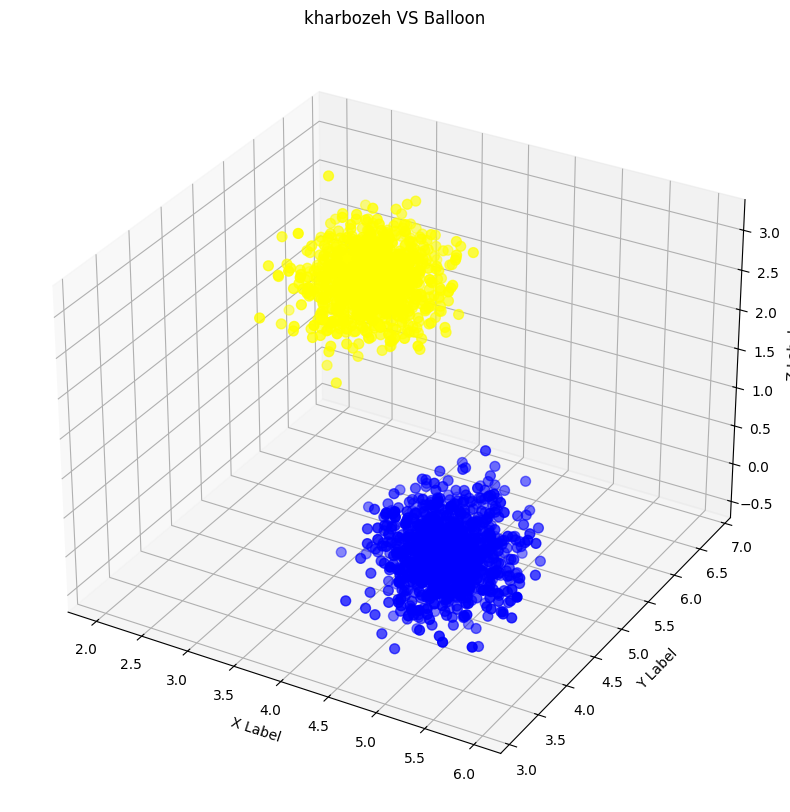

In [622]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')

ax.scatter(clean[0:N,0] , clean[0:N,1] , clean[0:N,2] , color='blue',s=50,label='balloon')
ax.scatter(clean[N:,0] , clean[N:,1] , clean[N:,2] , color='yellow' , s=50,label='kharbozeh')

plt.title('kharbozeh VS Balloon')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# ax.legend()
# ax.view_init(elev=20 , azim=30)

plt.show